In [1]:
import pandas as pd

# 1 - Convocação
# 0 - Julgamento
# https://docs.google.com/spreadsheets/d/1ldflWzFwBW8ksKxM6DDjJtMTcwQS5CIuu__1niRril0/edit?usp=sharing

atos = pd.read_csv("/content/drive/MyDrive/AILAB/Atos.csv")
atos.head()

,atos,classificacao
0,AVISO DE DESCLASSIFICAÇÃO E CONVOCAÇÃO DE LICI...,1
1,AVISO DE DESCLASSIFICAÇÃO E CONVOCAÇÃO REFEREN...,1
2,AVISO DE HOMOLOGAÇÃO E CONVOCAÇÃO COMPLEMENTAR...,1
3,AVISO DE HOMOLOGAÇÃO E CONVOCAÇÃO COMPLEMENTAR...,1
4,"""AVISO DE RESULTADO DE JULGAMENTO\nPREGÃO ELET...",0


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

def classificar_texto(texto, coluna_texto, coluna_classificacao):
  vetorizar = CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
  
  regressao_logistica = LogisticRegression(solver="lbfgs")
  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste, classe_teste)

print(classificar_texto(atos, "atos", "classificacao"))

0.75


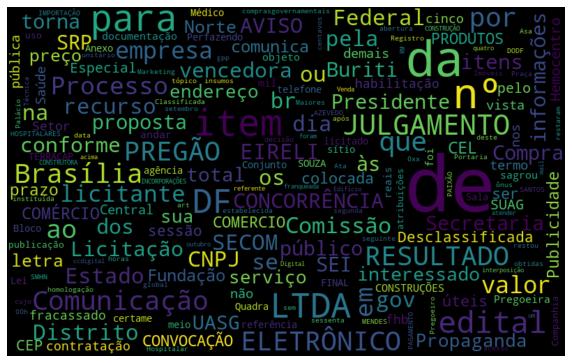

In [3]:
%matplotlib inline

from wordcloud import WordCloud
import matplotlib.pyplot as plt

todos_palavras = ' '.join([texto for texto in atos["atos"]])

# O collocation ignora os bgrams
nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(todos_palavras)

plt.figure(figsize= (10, 7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.axis('off')
plt.show()                       

In [4]:
atos_julgamento = atos.query("classificacao == '0'")
atos_julgamento.head()

,atos,classificacao
4,"""AVISO DE RESULTADO DE JULGAMENTO\nPREGÃO ELET...",0
5,AVISO DO RESULTADO DE JULGAMENTO DA DOCUMENTAÇ...,0
7,AVISO DO RESULTADO DE JULGAMENTO DAS PROPOSTAS...,0
9,AVISO DE RESULTADO DO JULGAMENTO DA HABILITAÇÃ...,0
12,AVISO DE RESULTADO DE JULGAMENTO\nPREGÃO ELETR...,0


In [5]:
atos_convocacao = atos.query("classificacao == 1")
atos_convocacao.head()

,atos,classificacao
0,AVISO DE DESCLASSIFICAÇÃO E CONVOCAÇÃO DE LICI...,1
1,AVISO DE DESCLASSIFICAÇÃO E CONVOCAÇÃO REFEREN...,1
2,AVISO DE HOMOLOGAÇÃO E CONVOCAÇÃO COMPLEMENTAR...,1
3,AVISO DE HOMOLOGAÇÃO E CONVOCAÇÃO COMPLEMENTAR...,1
6,EDITAL DE CONVOCAÇÃO\r\nASSEMBLEIA GERAL EXTRA...,1


In [6]:
def nuvem_palavras_julgamento(texto, coluna_texto):
  texto_pos = atos.query("classificacao == '0'")
  palavras_pos = ' '.join([texto for texto in texto_pos[coluna_texto]])
  
  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110,
                            collocations=False).generate(palavras_pos)
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

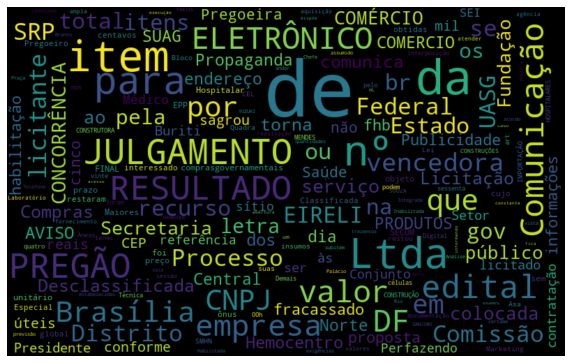

In [7]:
nuvem_palavras_julgamento(atos, "atos")

In [8]:
def nuvem_palavras_convocacao(texto, coluna_texto):
  texto_pos = atos.query("classificacao == '1'")
  palavras_pos = ' '.join([texto for texto in texto_pos[coluna_texto]])
  
  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110,
                            collocations=False).generate(palavras_pos)
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

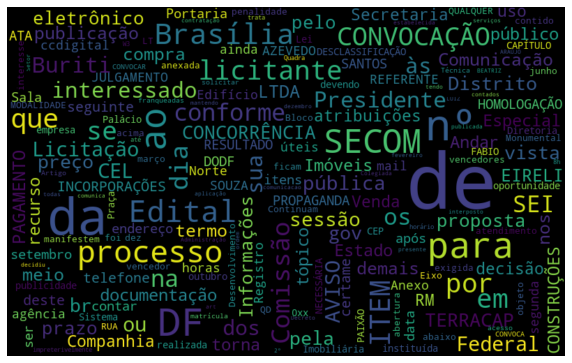

In [9]:
nuvem_palavras_convocacao(atos, "atos")

In [10]:
from nltk import tokenize
import nltk

token_espaco = tokenize.WhitespaceTokenizer()
todas_palavras = ' '.join([texto for texto in atos["atos"]])
frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
# Criamos um dataframe com as frequencias
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                             "Frequência": list(frequencia.values())})

df_frequencia.head()

,Palavra,Frequência
0,AVISO,32
1,DE,197
2,DESCLASSIFICAÇÃO,3
3,E,67
4,CONVOCAÇÃO,17


In [11]:
# Pegamos as 10 palavras que mais aparecem
df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = 10)
df_frequencia

,Palavra,Frequência
21,de,639
42,e,246
44,do,246
1,DE,197
84,no,190
33,-,182
39,da,173
37,a,151
103,o,136
30,para,109


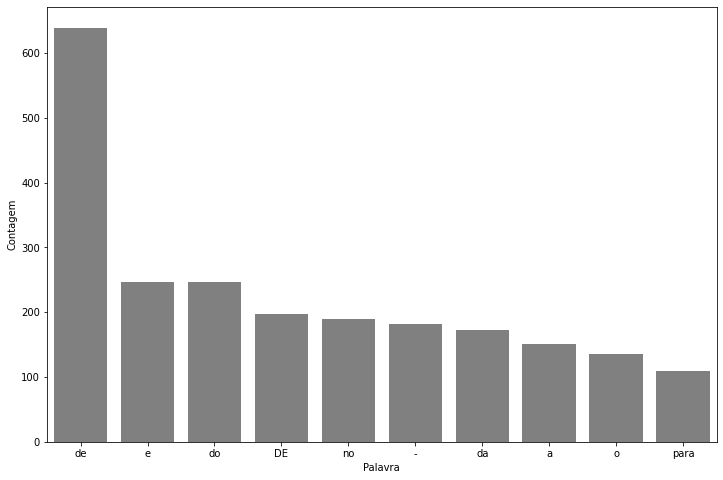

In [12]:
import seaborn as sns

plt.figure(figsize=(12,8))
ax = sns.barplot(data = df_frequencia, x= "Palavra", y = "Frequência", color = 'gray')
ax.set(ylabel = "Contagem")
plt.show()

### Criando funções para um pipeline de otimização.

In [13]:
import nltk
nltk.download('stopwords')
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
frase_processada = list()

for opiniao in atos["atos"]:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
atos["tratamento_1"] = frase_processada

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
atos.head()

,atos,classificacao,tratamento_1
0,AVISO DE DESCLASSIFICAÇÃO E CONVOCAÇÃO DE LICI...,1,AVISO DE DESCLASSIFICAÇÃO E CONVOCAÇÃO DE LICI...
1,AVISO DE DESCLASSIFICAÇÃO E CONVOCAÇÃO REFEREN...,1,AVISO DE DESCLASSIFICAÇÃO E CONVOCAÇÃO REFEREN...
2,AVISO DE HOMOLOGAÇÃO E CONVOCAÇÃO COMPLEMENTAR...,1,AVISO DE HOMOLOGAÇÃO E CONVOCAÇÃO COMPLEMENTAR...
3,AVISO DE HOMOLOGAÇÃO E CONVOCAÇÃO COMPLEMENTAR...,1,AVISO DE HOMOLOGAÇÃO E CONVOCAÇÃO COMPLEMENTAR...
4,"""AVISO DE RESULTADO DE JULGAMENTO\nPREGÃO ELET...",0,"""AVISO DE RESULTADO DE JULGAMENTO PREGÃO ELETR..."


In [15]:
print(atos["tratamento_1"][0])

AVISO DE DESCLASSIFICAÇÃO E CONVOCAÇÃO DE LICITANTE AO EDITAL Nº 01/2021–IMÓVEIS A COMPANHIA IMOBILIÁRIA DE BRASÍLIA – TERRACAP, Empresa Pública vinculada Secretaria Desenvolvimento Econômico, meio Comissão Permanente Licitação Venda Imóveis - COPLI, torna pública aplicação penalidade desclassificação retenção valor caucionado licitante preliminarmente classificado GILMAR MARTINS COSTA (Proposta Compra nº 5008850 - ITEM 16), tendo vista situação inadimplência junto Terracap, termos Tópico 77.5, CAPÍTULO X - DAS PENALIDADES. Dessa forma, ficam subsequentes licitantes interessados convocados que, prazo 10 (dez) dias úteis, contados publicação DODF presente aviso, manifestem, formalmente, interesse compra imóvel concordância preço oferecido primeiro, juntamente documentação exigida Capítulo V – B) DA DOCUMENTAÇÃO NECESSÁRIA PARA QUALQUER MODALIDADE DE PAGAMENTO, ficando homologação condicionada atendimento demais requisitos contidos aludido edital, respeitando-se ordem classificatória. Br

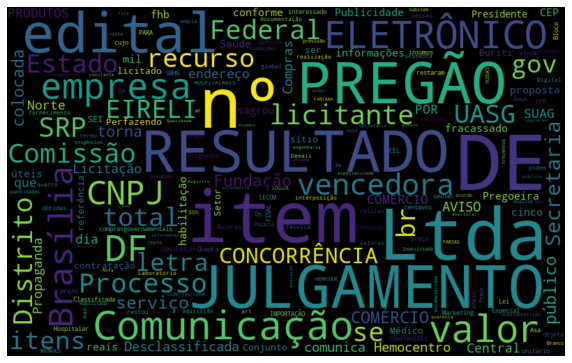

In [16]:
nuvem_palavras_julgamento(atos, "tratamento_1")

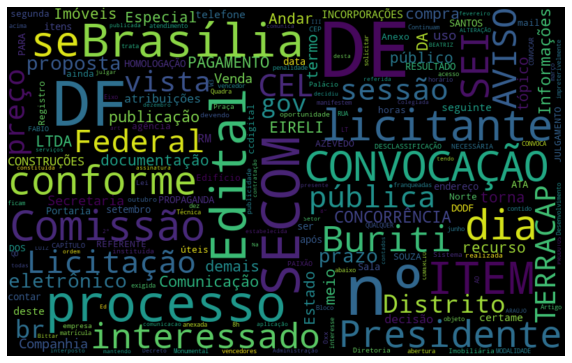

In [17]:
nuvem_palavras_convocacao(atos, "tratamento_1")

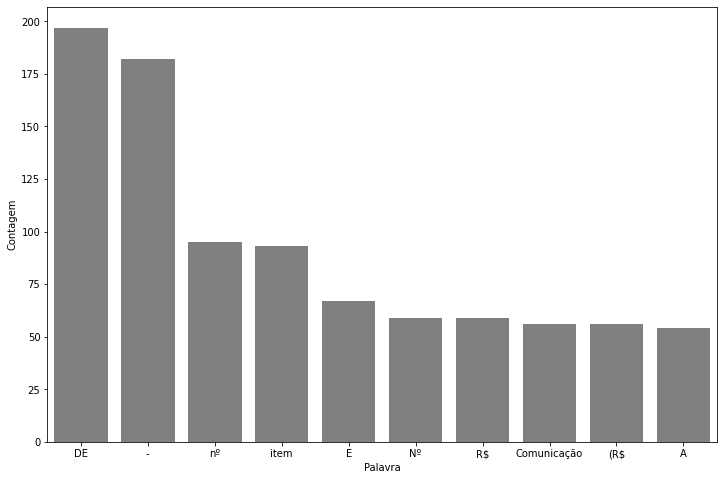

In [18]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                 "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x= "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()   

pareto(atos, "tratamento_1", 10)

In [19]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                                 texto[coluna_classificacao],
                                                                 random_state = 42)
    
    regressao_logistica = LogisticRegression(solver="lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    
    return regressao_logistica.score(teste, classe_teste)

acuracia_teste = classificar_texto(atos, "tratamento_1", "classificacao")
print(acuracia_teste)

0.6875


### Melhorando a visualização do pareto

In [20]:
from string import punctuation
from nltk import tokenize

token_pontuacao = tokenize.WordPunctTokenizer()
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in atos["tratamento_1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
atos["tratamento_2"] = frase_processada

In [21]:
atos.head()

,atos,classificacao,tratamento_1,tratamento_2
0,AVISO DE DESCLASSIFICAÇÃO E CONVOCAÇÃO DE LICI...,1,AVISO DE DESCLASSIFICAÇÃO E CONVOCAÇÃO DE LICI...,AVISO DE DESCLASSIFICAÇÃO E CONVOCAÇÃO DE LICI...
1,AVISO DE DESCLASSIFICAÇÃO E CONVOCAÇÃO REFEREN...,1,AVISO DE DESCLASSIFICAÇÃO E CONVOCAÇÃO REFEREN...,AVISO DE DESCLASSIFICAÇÃO E CONVOCAÇÃO REFEREN...
2,AVISO DE HOMOLOGAÇÃO E CONVOCAÇÃO COMPLEMENTAR...,1,AVISO DE HOMOLOGAÇÃO E CONVOCAÇÃO COMPLEMENTAR...,AVISO DE HOMOLOGAÇÃO E CONVOCAÇÃO COMPLEMENTAR...
3,AVISO DE HOMOLOGAÇÃO E CONVOCAÇÃO COMPLEMENTAR...,1,AVISO DE HOMOLOGAÇÃO E CONVOCAÇÃO COMPLEMENTAR...,AVISO DE HOMOLOGAÇÃO E CONVOCAÇÃO COMPLEMENTAR...
4,"""AVISO DE RESULTADO DE JULGAMENTO\nPREGÃO ELET...",0,"""AVISO DE RESULTADO DE JULGAMENTO PREGÃO ELETR...",AVISO DE RESULTADO DE JULGAMENTO PREGÃO ELETRÔ...


In [22]:
print(atos["tratamento_2"][0])

AVISO DE DESCLASSIFICAÇÃO E CONVOCAÇÃO DE LICITANTE AO EDITAL Nº 01 2021 – IMÓVEIS A COMPANHIA IMOBILIÁRIA DE BRASÍLIA – TERRACAP Empresa Pública vinculada Secretaria Desenvolvimento Econômico meio Comissão Permanente Licitação Venda Imóveis COPLI torna pública aplicação penalidade desclassificação retenção valor caucionado licitante preliminarmente classificado GILMAR MARTINS COSTA Proposta Compra nº 5008850 ITEM 16 ), tendo vista situação inadimplência junto Terracap termos Tópico 77 5 CAPÍTULO X DAS PENALIDADES Dessa forma ficam subsequentes licitantes interessados convocados prazo 10 dez dias úteis contados publicação DODF presente aviso manifestem formalmente interesse compra imóvel concordância preço oferecido primeiro juntamente documentação exigida Capítulo V – B DA DOCUMENTAÇÃO NECESSÁRIA PARA QUALQUER MODALIDADE DE PAGAMENTO ficando homologação condicionada atendimento demais requisitos contidos aludido edital respeitando ordem classificatória Brasília DF 05 março 2021 BRUNO 

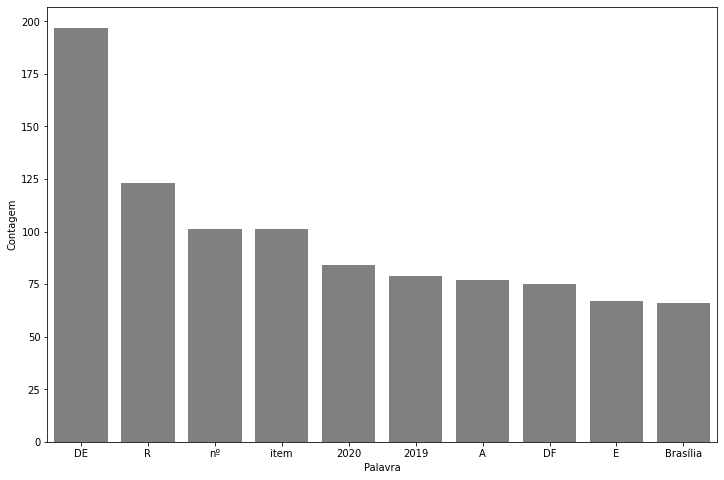

In [23]:
pareto(atos, "tratamento_2", 10)

In [24]:
!pip install unidecode
import unidecode

sem_acentos = [unidecode.unidecode(texto) for texto in atos["tratamento_2"]]
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]


     |████████████████████████████████| 245kB 6.1MB/s 


In [25]:
atos["tratamento_3"] = sem_acentos

frase_processada = list()
for opiniao in atos["tratamento_3"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
atos["tratamento_3"] = frase_processada

In [26]:
atos.head()

,atos,classificacao,tratamento_1,tratamento_2,tratamento_3
0,AVISO DE DESCLASSIFICAÇÃO E CONVOCAÇÃO DE LICI...,1,AVISO DE DESCLASSIFICAÇÃO E CONVOCAÇÃO DE LICI...,AVISO DE DESCLASSIFICAÇÃO E CONVOCAÇÃO DE LICI...,AVISO DE DESCLASSIFICACAO E CONVOCACAO DE LICI...
1,AVISO DE DESCLASSIFICAÇÃO E CONVOCAÇÃO REFEREN...,1,AVISO DE DESCLASSIFICAÇÃO E CONVOCAÇÃO REFEREN...,AVISO DE DESCLASSIFICAÇÃO E CONVOCAÇÃO REFEREN...,AVISO DE DESCLASSIFICACAO E CONVOCACAO REFEREN...
2,AVISO DE HOMOLOGAÇÃO E CONVOCAÇÃO COMPLEMENTAR...,1,AVISO DE HOMOLOGAÇÃO E CONVOCAÇÃO COMPLEMENTAR...,AVISO DE HOMOLOGAÇÃO E CONVOCAÇÃO COMPLEMENTAR...,AVISO DE HOMOLOGACAO E CONVOCACAO COMPLEMENTAR...
3,AVISO DE HOMOLOGAÇÃO E CONVOCAÇÃO COMPLEMENTAR...,1,AVISO DE HOMOLOGAÇÃO E CONVOCAÇÃO COMPLEMENTAR...,AVISO DE HOMOLOGAÇÃO E CONVOCAÇÃO COMPLEMENTAR...,AVISO DE HOMOLOGACAO E CONVOCACAO COMPLEMENTAR...
4,"""AVISO DE RESULTADO DE JULGAMENTO\nPREGÃO ELET...",0,"""AVISO DE RESULTADO DE JULGAMENTO PREGÃO ELETR...",AVISO DE RESULTADO DE JULGAMENTO PREGÃO ELETRÔ...,AVISO DE RESULTADO DE JULGAMENTO PREGAO ELETRO...


In [27]:
acuracia_tratamento3 = classificar_texto(atos, "tratamento_3", "classificacao")
print(acuracia_tratamento3)

0.75


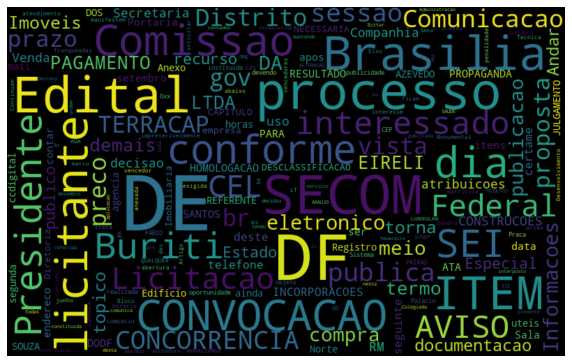

In [28]:
nuvem_palavras_convocacao(atos, "tratamento_3")

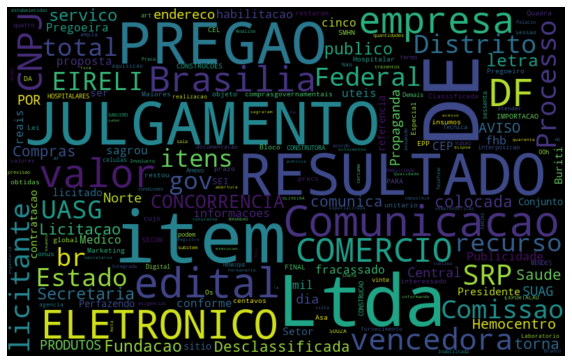

In [29]:
nuvem_palavras_julgamento(atos, "tratamento_3")

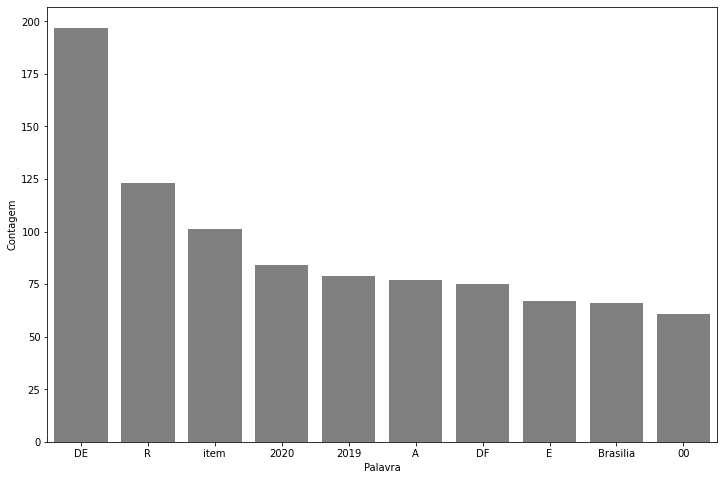

In [30]:
pareto(atos, "tratamento_3", 10)

In [31]:
frase_processada = list()
for opiniao in atos["tratamento_3"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
atos["tratamento_4"] = frase_processada

In [32]:
atos["tratamento_4"][0]

'aviso desclassificacao convocacao licitante edital 01 2021 imoveis companhia imobiliaria brasilia terracap empresa publica vinculada secretaria desenvolvimento economico meio comissao permanente licitacao venda imoveis copli torna publica aplicacao penalidade desclassificacao retencao valor caucionado licitante preliminarmente classificado gilmar martins costa proposta compra 5008850 item 16 ), tendo vista situacao inadimplencia junto terracap termos topico 77 5 capitulo x penalidades dessa forma ficam subsequentes licitantes interessados convocados prazo 10 dez dias uteis contados publicacao dodf presente aviso manifestem formalmente interesse compra imovel concordancia preco oferecido primeiro juntamente documentacao exigida capitulo v b documentacao necessaria qualquer modalidade pagamento ficando homologacao condicionada atendimento demais requisitos contidos aludido edital respeitando ordem classificatoria brasilia df 05 marco 2021 bruno cesar santana meneses presidente comissao'

In [33]:
acuracia_tratamento4 = classificar_texto(atos, "tratamento_4", "classificacao")
print(acuracia_tratamento4)
print(acuracia_tratamento3)

0.8125
0.75


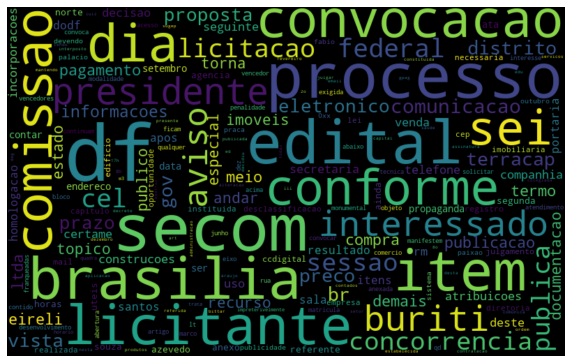

In [34]:
nuvem_palavras_convocacao(atos, "tratamento_4")

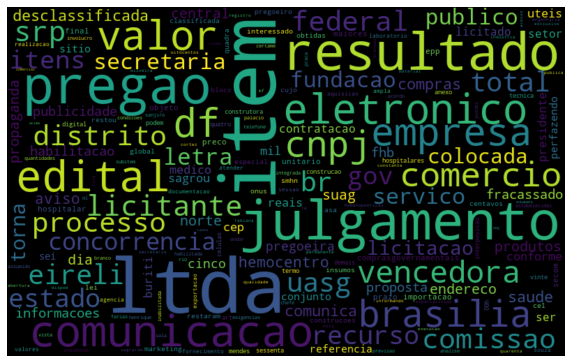

In [35]:
nuvem_palavras_julgamento(atos, "tratamento_4")

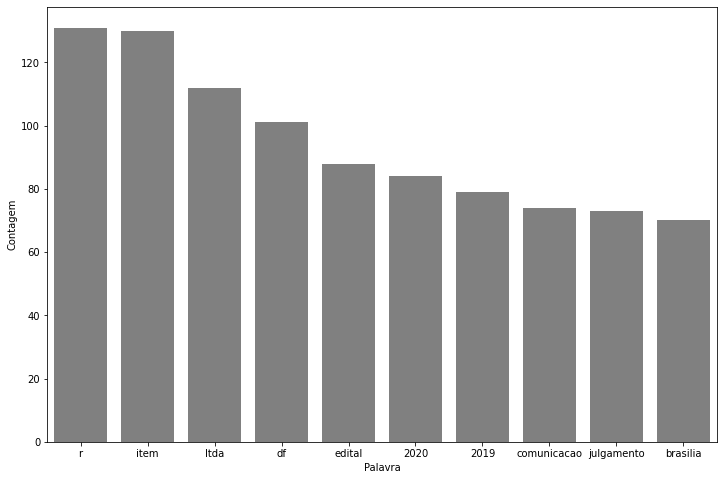

In [36]:
pareto(atos, "tratamento_4", 10)

In [37]:
import nltk
nltk.download('rslp')

stemmer = nltk.RSLPStemmer()
frase_processada = list()
for opiniao in atos["tratamento_4"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
          nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))
    
atos["tratamento_5"] = frase_processada

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [38]:
acuracia_tratamento5 = classificar_texto(atos, "tratamento_5", "classificacao")
print(acuracia_tratamento5)
print(acuracia_tratamento4)

0.8125
0.8125


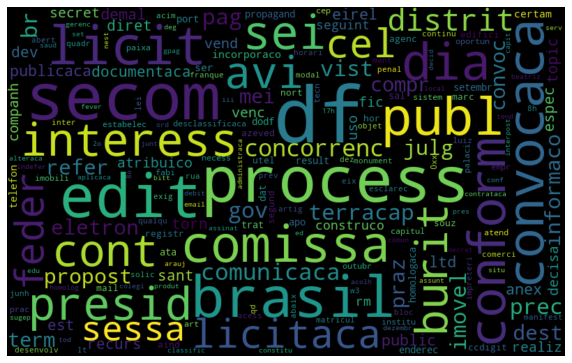

In [39]:
nuvem_palavras_convocacao(atos, "tratamento_5")

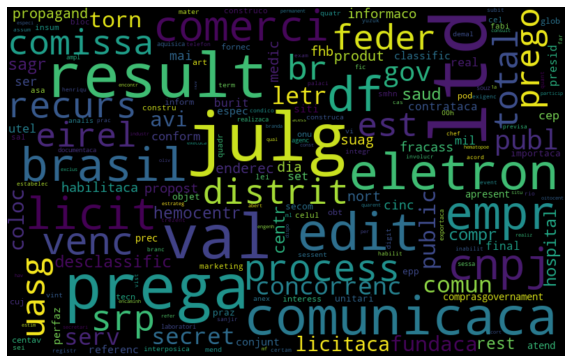

In [40]:
nuvem_palavras_julgamento(atos, "tratamento_5")

### TF-IDF e Ngrams: técnicas mais avançadas

In [41]:
# Cria pesos as palavras importantes
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk import ngrams

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

tfidf_tratados = tfidf.fit_transform(atos["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados,
                                                              atos["classificacao"],
                                                              random_state = 42)
regressao_logistica = LogisticRegression(solver = "lbfgs")
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_tratados)

0.875


In [42]:
# O vetor vai conter palavras isoladas e bigramas
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))

vetor_tfidf = tfidf.fit_transform(atos["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              atos["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.875


In [43]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names()
)

pesos.nlargest(50,0)

,0
secom,0.471608
2019,0.357108
df,0.289487
convocaca,0.281619
sei,0.233411
burit,0.225498
secom df,0.203138
000,0.196959
process sei,0.189687
sessa,0.188249


In [44]:
pesos.nsmallest(10,0)

,0
prega,-0.371322
val,-0.352750
prega eletron,-0.263716
coloc,-0.234794
julg prega,-0.231716
0001,-0.225052
cnpj,-0.216013
result julg,-0.214957
ltd,-0.205359
srp,-0.204079


In [45]:
ato = atos["tratamento_5"][0]
print(ato)

avis desclassificaca convocaca licit edit 01 2021 imovel companh imobili brasil terracap empr publ vincul secret desenvolv econom mei comissa permanent licitaca vend imovel copl torn publ aplicaca penal desclassificaca retenca val caucion licit prelimin classific gilm martim cost propost compr 5008850 it 16 ), tend vist situaca inadimplenc junt terracap term topic 77 5 capitul x penal dess form fic subsequ licit interess convoc praz 10 dez dia utel cont publicaca dodf pres avis manifest formal inter compr imovel concordanc prec oferec prim junt documentaca exig capitul v b documentaca necess qualqu modal pag fic homologaca condicion atend demal requisit cont alud edit respeit ord classific brasil df 05 marc 2021 brun ces sant menes presid comissa


In [46]:
import re
def remover(textos, regex):
    if type(textos) == str:
        return regex.sub("", textos)
    else:
        return [regex.sub("", texto) for texto in textos]

In [47]:
regex_numbers = re.compile(r"[0-9]+")
ato_sem_numero = remover(ato, regex_numbers)
print(ato_sem_numero)

avis desclassificaca convocaca licit edit   imovel companh imobili brasil terracap empr publ vincul secret desenvolv econom mei comissa permanent licitaca vend imovel copl torn publ aplicaca penal desclassificaca retenca val caucion licit prelimin classific gilm martim cost propost compr  it  ), tend vist situaca inadimplenc junt terracap term topic   capitul x penal dess form fic subsequ licit interess convoc praz  dez dia utel cont publicaca dodf pres avis manifest formal inter compr imovel concordanc prec oferec prim junt documentaca exig capitul v b documentaca necess qualqu modal pag fic homologaca condicion atend demal requisit cont alud edit respeit ord classific brasil df  marc  brun ces sant menes presid comissa


In [48]:
def substituir_codigo(textos, regex):
    if type(textos) == str:
        return regex.sub("", textos)
    else:
        return [regex.sub("", texto) for texto in textos]

In [49]:
ato_sem_numero = substituir_codigo(atos["tratamento_5"],regex_numbers)
atos["tratamento_6"] = ato_sem_numero
print(atos["tratamento_6"][0])

avis desclassificaca convocaca licit edit   imovel companh imobili brasil terracap empr publ vincul secret desenvolv econom mei comissa permanent licitaca vend imovel copl torn publ aplicaca penal desclassificaca retenca val caucion licit prelimin classific gilm martim cost propost compr  it  ), tend vist situaca inadimplenc junt terracap term topic   capitul x penal dess form fic subsequ licit interess convoc praz  dez dia utel cont publicaca dodf pres avis manifest formal inter compr imovel concordanc prec oferec prim junt documentaca exig capitul v b documentaca necess qualqu modal pag fic homologaca condicion atend demal requisit cont alud edit respeit ord classific brasil df  marc  brun ces sant menes presid comissa


In [50]:
regex_espaco = re.compile(r" +")
regex_quebra_linha = re.compile(r"(\n)")
def substituir_por_espaco(textos, regex):
    if type(textos) == str:
        return regex.sub(" ", textos)
    else:
        return [regex.sub(" ", texto) for texto in textos]
    
atos_sem_espaço = substituir_por_espaco(atos["tratamento_6"], regex_espaco)
atos_sem_quebra_linha = substituir_por_espaco(atos_sem_espaço, regex_quebra_linha)

atos["tratamento_7"] = atos_sem_quebra_linha
print(atos["tratamento_7"][0])

avis desclassificaca convocaca licit edit imovel companh imobili brasil terracap empr publ vincul secret desenvolv econom mei comissa permanent licitaca vend imovel copl torn publ aplicaca penal desclassificaca retenca val caucion licit prelimin classific gilm martim cost propost compr it ), tend vist situaca inadimplenc junt terracap term topic capitul x penal dess form fic subsequ licit interess convoc praz dez dia utel cont publicaca dodf pres avis manifest formal inter compr imovel concordanc prec oferec prim junt documentaca exig capitul v b documentaca necess qualqu modal pag fic homologaca condicion atend demal requisit cont alud edit respeit ord classific brasil df marc brun ces sant menes presid comissa


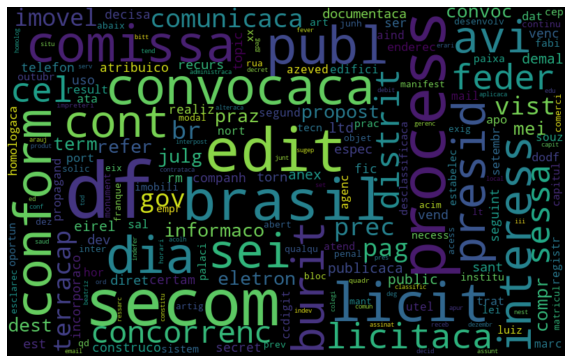

In [51]:
nuvem_palavras_convocacao(atos, "tratamento_7")

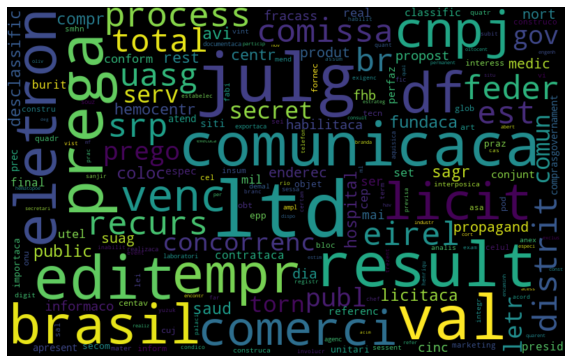

In [52]:
nuvem_palavras_julgamento(atos, "tratamento_7")

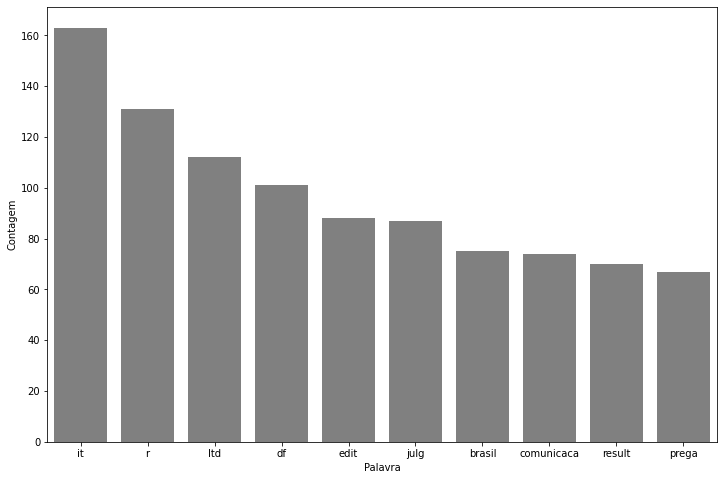

In [53]:
pareto(atos, "tratamento_7", 10)

In [54]:
# O vetor vai conter palavras isoladas e bigramas
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))

vetor_tfidf = tfidf.fit_transform(atos["tratamento_7"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              atos["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.875


In [55]:
print(atos["tratamento_7"][5])

avis result julg documentaca habilitaca concorrenc presid comissa espec licitaca cel secom institu port secom df n dezembr public diari ofic distrit feder dodf n dezembr pagin uso atribuico cumpr disciplin letr e it it edit concorrenc acim referenci cuj objet obtenca propost contrataca serv public ser prest agenc propagand obje atend departament transit distrit federaldetran df torn publ result julg documentaca habilitaca apur sessa publ novembr licit cnpj result motiv companh comunicaca public ltd habilit av comunicaca marketing ltd habilit nov sb comunicaca ltd inabilit apresent documentaca habilitaca it edit ). sgn public propagand eirel inabilit apresent documentaca habilitaca it edit ). propagand desig ltd inabilit apresent documentaca habilitaca it edit ). debrit propagand ltd inabilit apresent documentaca habilitaca it edit ). ata abert quart sessa documentaca habilitaca licit habilit encontr disponi enderec eletron http :// www comunicaca df gov br concorrenc detran cel secom s

In [56]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names()
)

pesos.nlargest(50,0)

,0
secom,0.505423
convocaca,0.306481
df,0.303172
sei,0.253672
burit,0.241797
secom df,0.218141
process sei,0.206513
sessa,0.202512
dia,0.195759
interess,0.189769


In [57]:
pesos.nsmallest(10,0)

,0
prega,-0.429724
val,-0.406922
prega eletron,-0.304621
julg prega,-0.268254
cnpj,-0.259317
coloc,-0.251805
result julg,-0.249418
ltd,-0.244885
eletron srp,-0.237925
srp,-0.237925
